<a href="https://colab.research.google.com/github/geoburdin/core_samples/blob/master/json_to_png.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
2
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... Fal

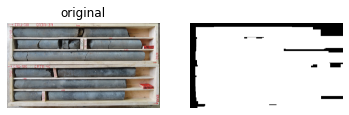

True

In [12]:
import json
import numpy as np
import skimage.io
import cv2
import matplotlib.pyplot as plt
import PIL.Image
import PIL.ImageDraw
import numpy

data=json.load(open('/content/rocks_coco.json'))
 
# img_path=data['imagePath'].split('/')[-1]
img_path = '1.png'
img=skimage.io.imread(img_path)

def polygons_to_mask(img_shape, polygons):
 
    mask = np.zeros(img_shape, dtype=np.uint8)
    mask = PIL.Image.fromarray(mask)
    xy = list(map(tuple, polygons))
    PIL.ImageDraw.Draw(mask).polygon(xy=xy, outline=1, fill=1)
    mask = np.array(mask, dtype=bool)
    return mask
 
def polygons_to_mask2(img_shape, polygons):
 
    mask = np.zeros(img_shape, dtype=np.uint8)
    polygons = np.asarray([polygons], np.int32) # This must be int32, other types using fillPoly will report an error
    # cv2.fillPoly(mask, polygons, 1) # Non-int32 will report an error
    cv2.fillConvexPoly(mask, polygons, 1) # Non-int32 will report an error
    return mask
 
points=[]
labels=[]
 
annotations = data['annotations']
len_ann = len(annotations)
 
half_mask=[]
final_mask=[]
 
for ann in annotations:
    seg1 = ann['segmentation']
    seg = seg1[0]
    for j in range(0,len(seg),2):
        x = seg[j]
        y = seg[j+1]
        mas = [x,y]
        half_mask.append(mas)
    final_mask.append(half_mask)
    half_mask=[]
 
mask0=polygons_to_mask(img.shape[:2],final_mask[0])
 
if len_ann>2:
    for i in range(1,len_ann):
        print(i)
        maskany=polygons_to_mask(img.shape[:2],final_mask[i])
        print(mask0)
        print(maskany)
        mask0 += maskany
else:
    maskany=polygons_to_mask(img.shape[:2],final_mask[len_ann-1])
    print(mask0)
    print(maskany)
    mask0 += maskany
 
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title('original')
 
plt.subplot(122)
plt.imshow(mask0.astype(np.uint8),'gray')
plt.axis('off')

plt.show()

(thresh, im_bw) = cv2.threshold(mask0.astype(np.uint8), 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
thresh = 0
im_bw = cv2.threshold(mask0.astype(np.uint8), thresh, 255, cv2.THRESH_BINARY)[1]

cv2.imwrite('bw_image.png', im_bw)